# Pendule Simple

## 1. Existence des solutions

L'équation simplifié du pendule est $$ x''(t) = - sin(x(t))$$
avec cmme condition initiale $x(0) = 0$  et $x'(0) = v_0$. On va tracer les solutions pour différentes valeurs de $v_0$ en utilisant la méthode d'Euler.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def f(u):
    return array([u[1], - sin(u[0])])

In [3]:
def euler(x0, v0, T, N):
    h = T/N
    sol = zeros((2,N + 1))
    sol[0, 0] = x0
    sol[1, 0] = v0
    for i in range(N):
        sol[:, i + 1] = sol[:, i]+ h * f(sol[:, i])
    return sol

In [4]:
T = 10
N = 10000
x0 = 0
t = linspace(0, T, N + 1)

Text(0.5, 1.0, 'Portrait de phases')

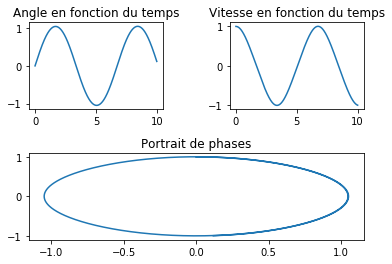

In [5]:
v0 = 1
x1 = euler(x0, v0, T, N)

subplots_adjust(wspace=0.5, hspace=0.5)
ax1 = subplot(221)
ax1.plot(t, x1[0, :])
ax1.set_title('Angle en fonction du temps')

ax2 = subplot(222)
ax2.plot(t, x1[1, :])
ax2.set_title('Vitesse en fonction du temps')

ax3 = subplot(212)
ax3.plot(x1[0, :], x1[1, :])
ax3.set_title('Portrait de phases')

Text(0.5, 1.0, 'Portrait de phases')

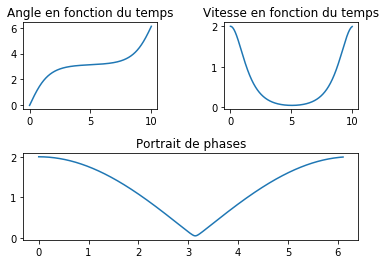

In [6]:
v0 = 2
x1 = euler(x0, v0, T, N)

subplots_adjust(wspace=0.5, hspace=0.5)
ax1 = subplot(221)
ax1.plot(t, x1[0, :])
ax1.set_title('Angle en fonction du temps')

ax2 = subplot(222)
ax2.plot(t, x1[1, :])
ax2.set_title('Vitesse en fonction du temps')

ax3 = subplot(212)
ax3.plot(x1[0, :], x1[1, :])
ax3.set_title('Portrait de phases')

Text(0.5, 1.0, 'Portrait de phases')

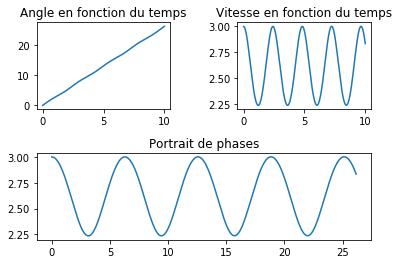

In [7]:
v0 = 3
x1 = euler(x0, v0, T, N)

subplots_adjust(wspace=0.5, hspace=0.5)
ax1 = subplot(221)
ax1.plot(t, x1[0, :])
ax1.set_title('Angle en fonction du temps')

ax2 = subplot(222)
ax2.plot(t, x1[1, :])
ax2.set_title('Vitesse en fonction du temps')

ax3 = subplot(212)
ax3.plot(x1[0, :], x1[1, :])
ax3.set_title('Portrait de phases')

Ainsi on distingue $3$ régimes différents:
1. Un régime périodique qui correspond aux petites scillations. 
2. Un régime transitoire pour une vitesse initiale limite = 2.
3. Un régime apériodique pour des grandes oscillations où le pendule fait un tour complet à chaques oscillation.

## Comparaison des Schémas numériques

In [8]:
def heun(x0, v0, T, N):
    h = T/N
    sol = zeros((2,N + 1))
    sol[0, 0] = x0
    sol[1, 0] = v0
    for i in range(N):
        sol[:, i + 1] = sol[:, i]+ h * f(sol[:, i] +h / 2 * f(sol[:, i]))
    return sol

In [9]:
T = 10
N = 100
x0 = 0
t = linspace(0, T, N + 1)

Text(0.5, 1.0, 'Portrait de phases avec Heun')

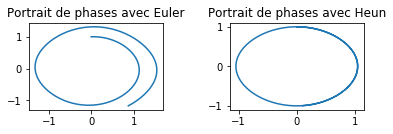

In [10]:
v0 = 1
x = euler(x0, v0, T, N)
x1 = heun(x0, v0, T, N)


subplots_adjust(wspace=0.5, hspace=0.5)
ax = subplot(221)
ax.plot(x[0, :], x[1, :])
ax.set_title('Portrait de phases avec Euler')

ax1 = subplot(222)
ax1.plot(x1[0, :], x1[1, :])
ax1.set_title('Portrait de phases avec Heun')

On voit bien que la méthode de Heun est bien plus rapide que celle d'Euler. Le régime périodique est bien mis en évidence avec la méthode de Heun mais bien plus loin avec celle d'Euler.

## Champs de Vecteurs et portrait de Phases

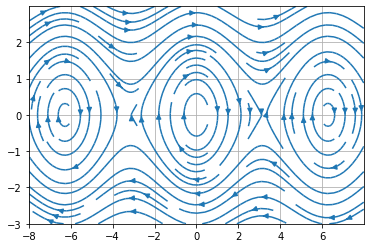

In [11]:
x, y = meshgrid(arange(-8, 8, 0.01), arange(-3, 3, 0.01))
xp = y
yp = - sin(x)
streamplot(x, y, xp, yp)
grid()

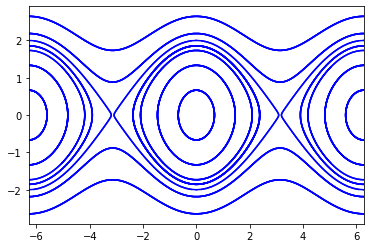

In [12]:
X0 = linspace(-2 * pi, 2 * pi, 7)
V0 = linspace(-2, 2, 7)
for x0 in X0:
    for v0 in V0:
        x = heun(x0, v0, T, N)
        plot(x[0, :], x[1, :], 'b')
        plot(x[0, :], -x[1, :], 'b')
        xlim([-2 * pi, 2 * pi])
